# Figure 1

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd
import scrublet as scr

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("white")

sc.settings.verbosity=3

In [4]:
import os, sys
sys.path.append(f"{os.getcwd()}/../code")
from plotting.plot_settings import *
from plotting.palettes import *
from plotting.scatter import *
from plotting.matrix import *

In [5]:
from plotting.fig1 import summary_figure_1d, summary_figure_1e

## Load data

In [6]:
data_dir = f"{os.getcwd()}/../data"

In [7]:
main = sc.read(f"{data_dir}/main.h5ad")
#mye = sc.read(f"{data_dir}/mye.h5ad")
#lym = sc.read(f"{data_dir}/lym.h5ad")
#epi = sc.read(f"{data_dir}/epi.h5ad")
#stro = sc.read(f"{data_dir}/stro.h5ad")
#endo = sc.read(f"{data_dir}/endo.h5ad")
#org = sc.read(f"{data_dir}/org.h5ad")

In [8]:
fig_dir = f"{os.getcwd()}/../figures"

## TEMPORARY - Palettes

In [9]:
from matplotlib.colors import hex2color
sample_type_color_mapping = {
    "Ctrl": "#9dcbb9",
    "EcP": "#2c387a",
    "EcPA": "#4f699e",
    "EcO": "#757097",
    "EuE": "#34693D",
}
sample_type_cats = list(sample_type_color_mapping.keys())
sample_type_palette = [hex2color(v) for v in sample_type_color_mapping.values()]

celltype_palette = main.uns["celltype_main_colors"]

## Fig 1d

In [10]:
sample_type_key = "sample_type_rename"
patient_key = "PID"
celltype_key = "celltype_main"

In [11]:
patient_palette = sns.color_palette("husl", 18, desat=0.8)

In [12]:
main.obs[patient_key].cat.reorder_categories([
    f"C{k:02}" for k in range(1, 4) ] + [
    f"E{k:02}" for k in range(1, 12)
], inplace=True)
main.obs[sample_type_key].cat.reorder_categories(sample_type_cats, inplace=True)

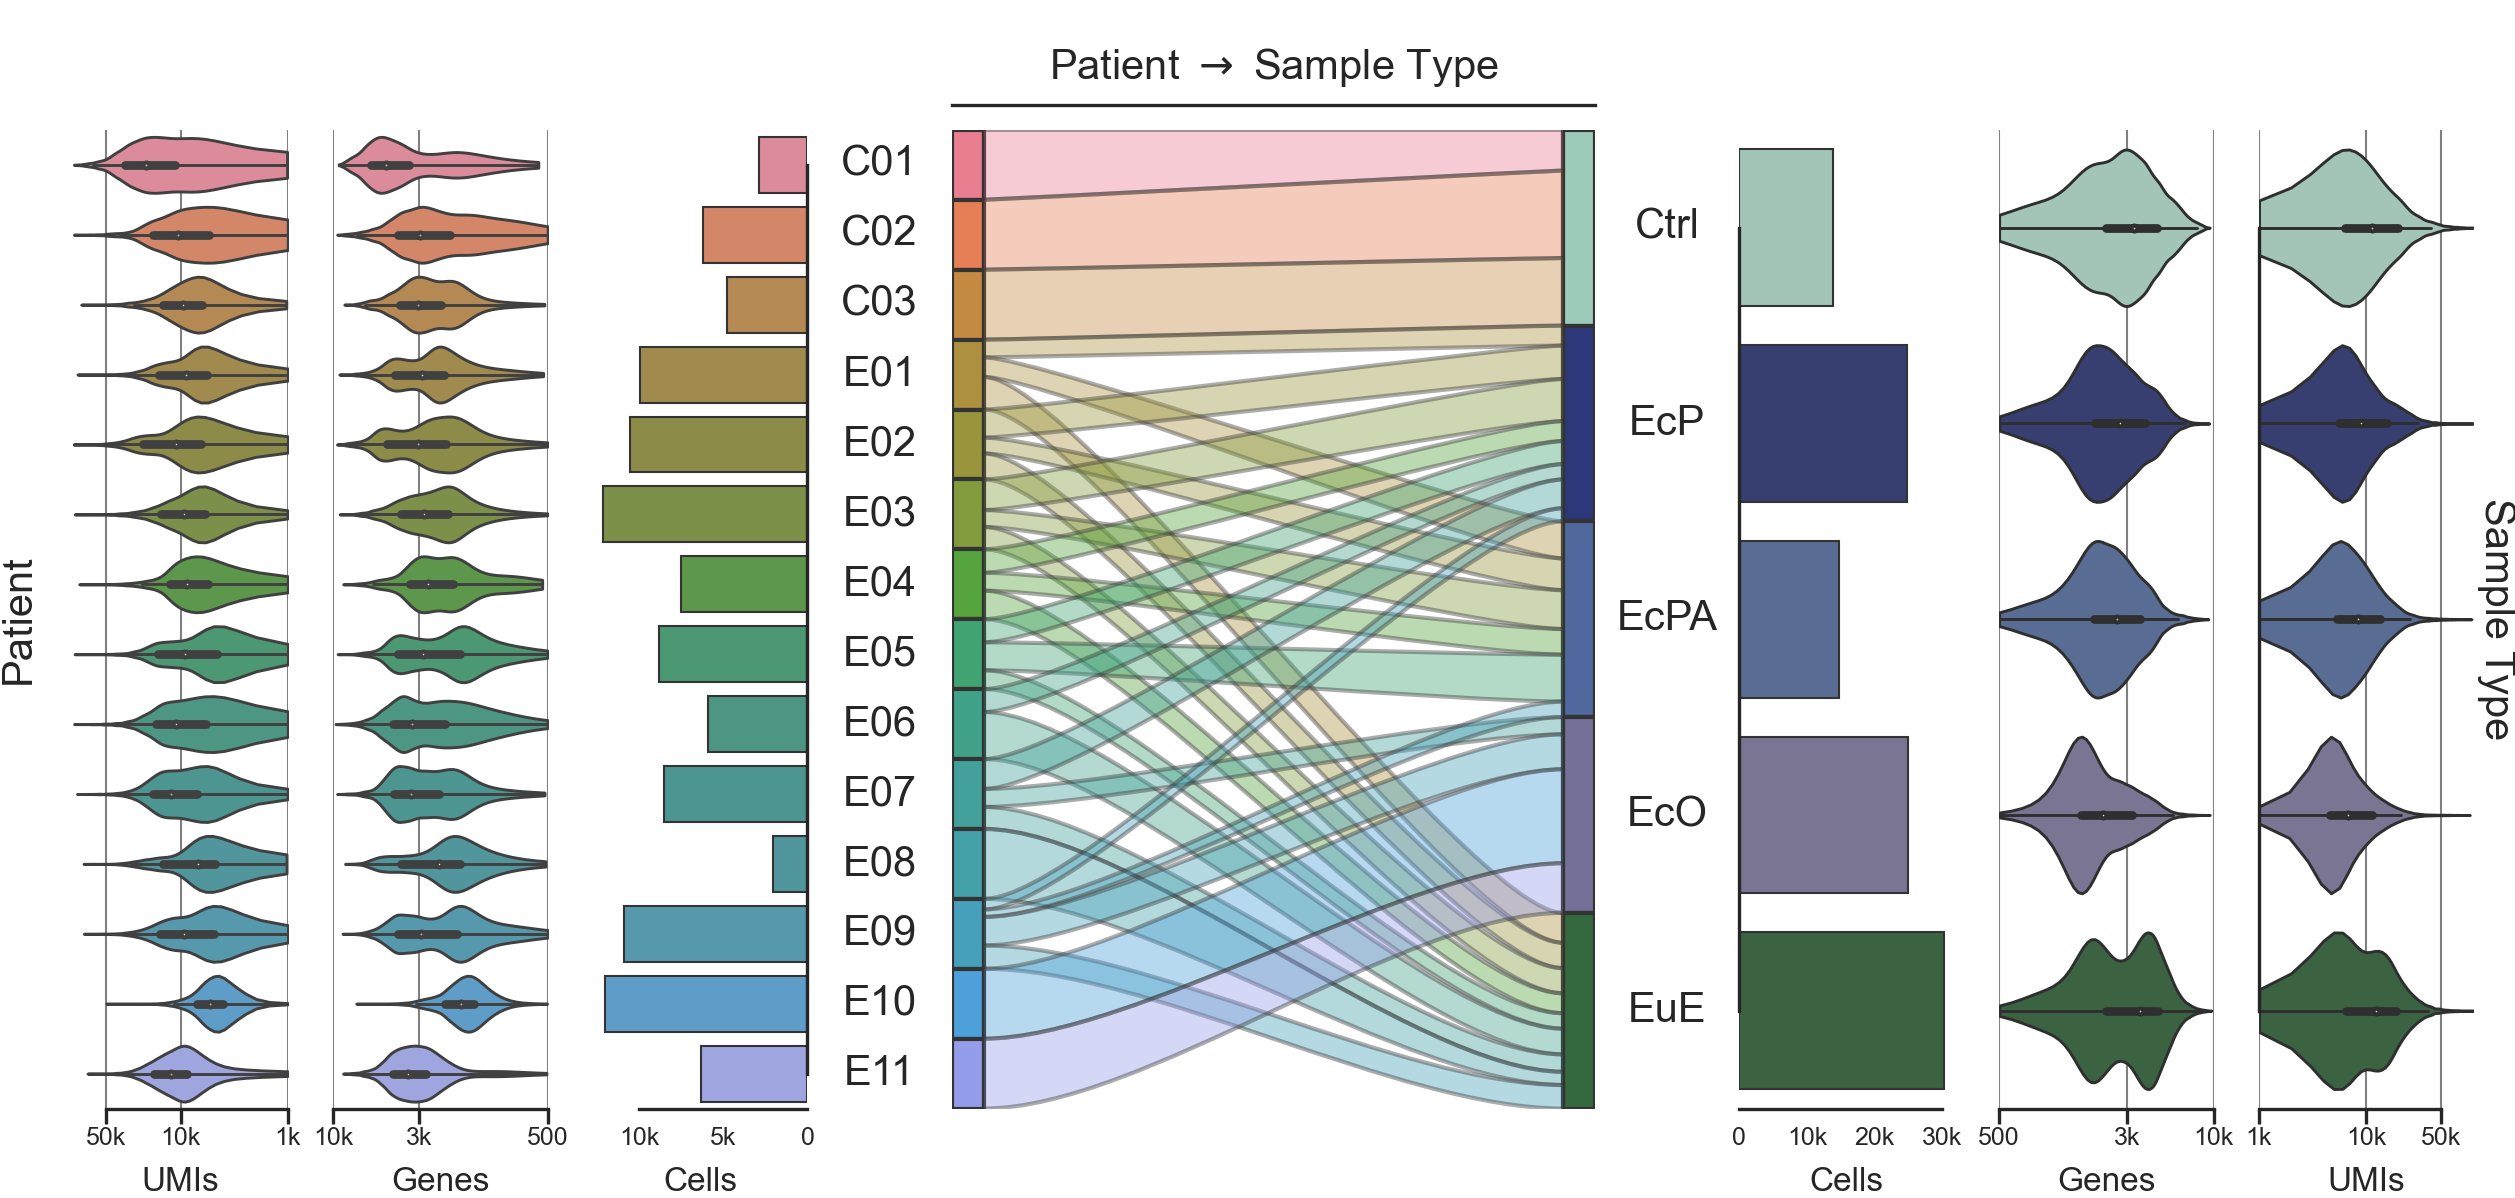

In [13]:
fig1d = summary_figure_1d(
    main, patient_key, sample_type_key, 
    x_palette=[], 
    left_palette=patient_palette, 
    right_palette=sample_type_palette,
    use_log=True,
)

In [ ]:
fig1d.savefig(f"{fig_dir}/fig1d.pdf")

## Fig 1e

In [14]:
imc_markers = ["panCK", "COL1A1/CD10", "CD31", "CD68", "CD3/CD20/CD56"]

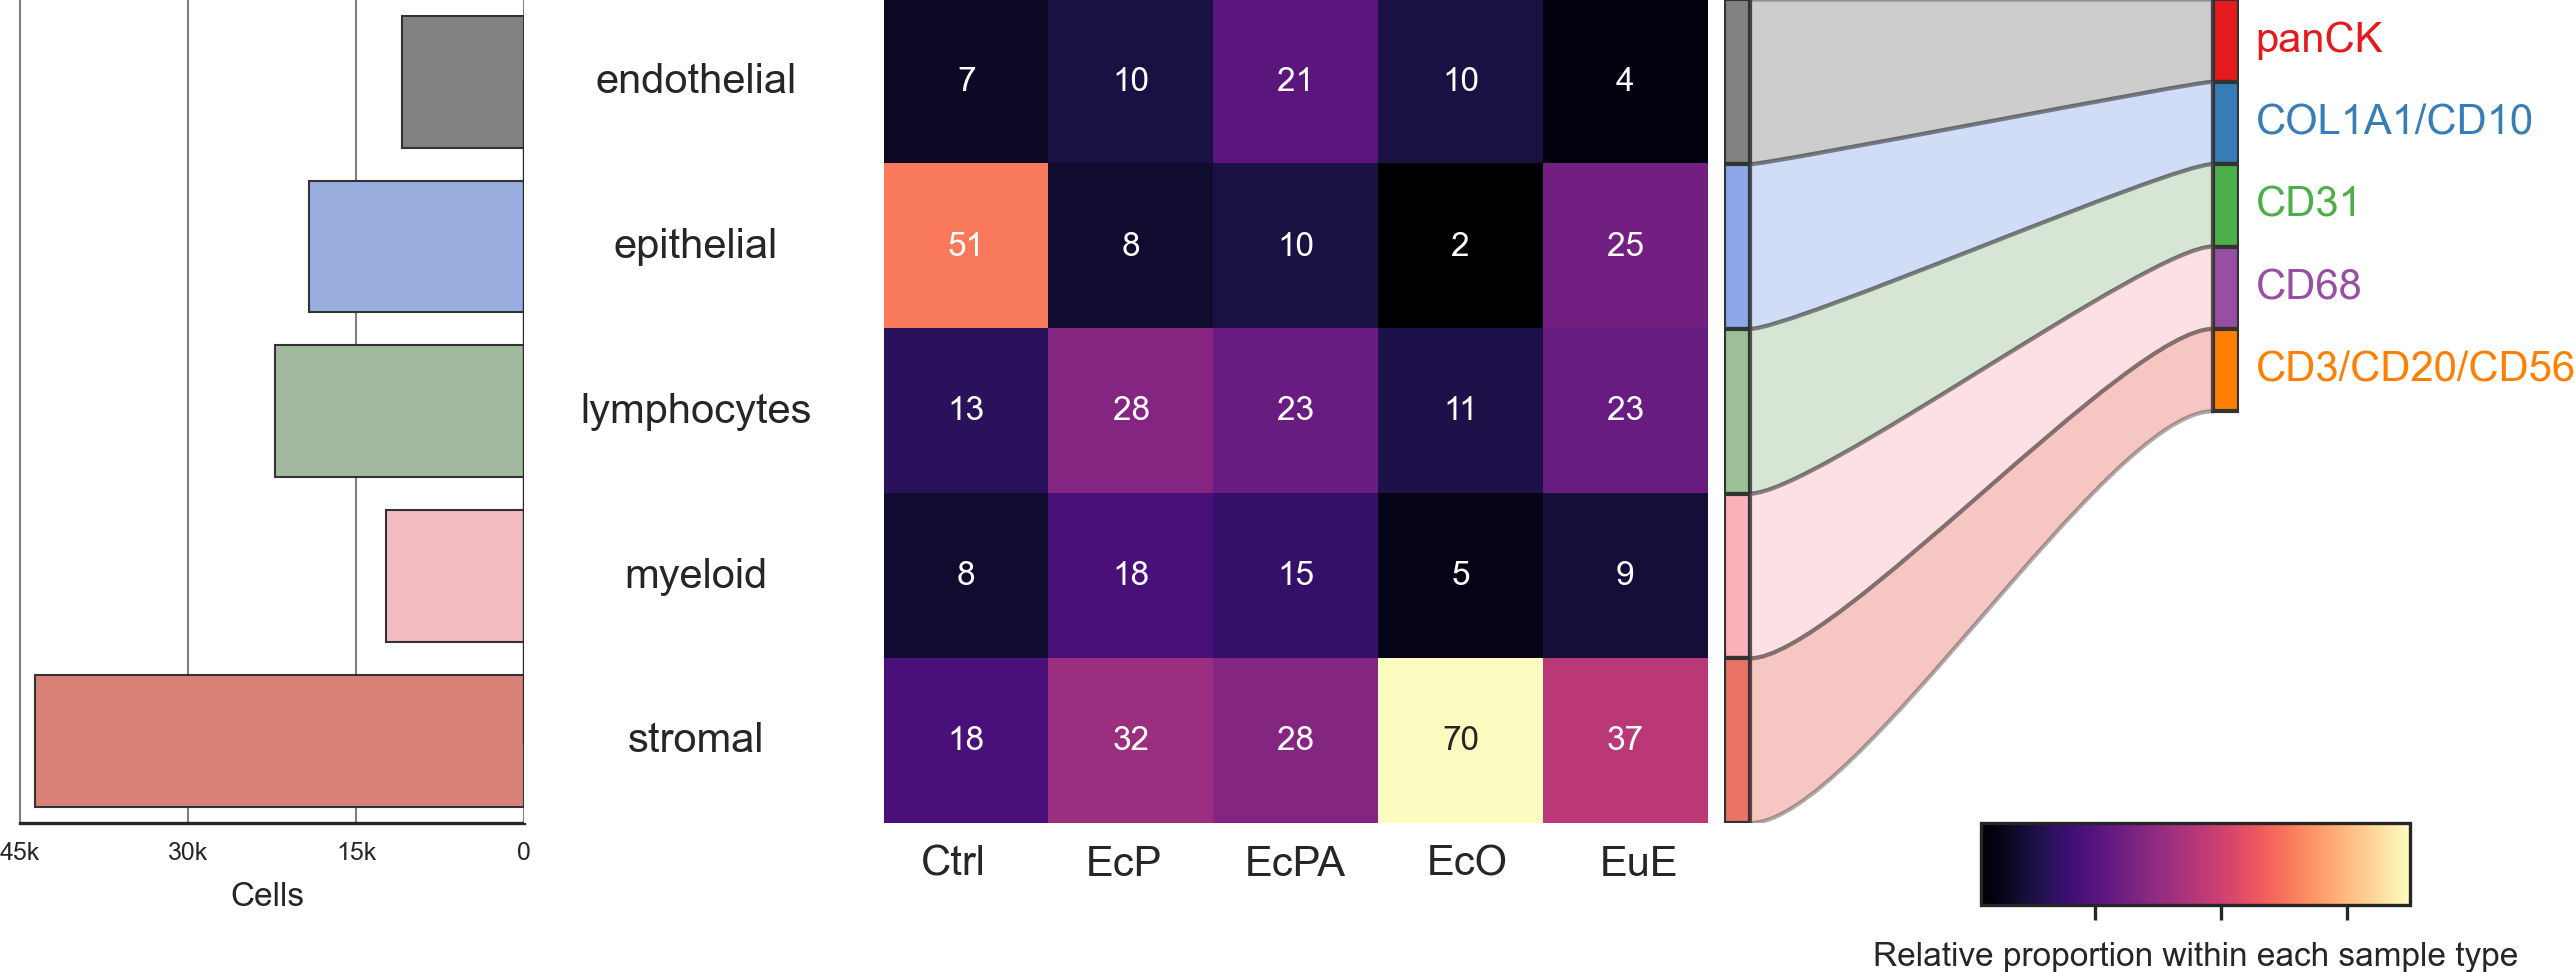

In [16]:
fig1e = summary_figure_1e(
    main,
    sample_type_key, 
    celltype_key, 
    imc_markers,
    x_palette=[], left_palette=celltype_palette, right_palette=[],
    cmap="magma",
    use_log=True
)

In [ ]:
fig1e.savefig(f"{fig_dir}/fig1e.pdf")